In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
import pandas as pd
%matplotlib inline
from scipy.stats import norm, cauchy, multivariate_normal, beta
matplotlib.rc('font', size=22)

# Статистики на выборке

In [241]:
population = norm.rvs(size=10000)

In [242]:
def draw_sample(N):
    sample = population[:N]
    mean = sample.mean()
    std =  sample.std()
    median = np.median(sample)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.hist(np.clip(sample,-10,10), bins = 100, range = [-10, 10], label = "Data")
    ax.axvline(mean, color = "red", label = "Mean {:10.2f}".format(mean))
    ax.axvline(median, color = "green", label = "Median {:10.2f}".format(median))
    l5 = ax.fill_between([max(-10, mean-std/2),min(mean+std/2,10)], 0, 1, 
                color='green', alpha=0.5, transform=ax.get_xaxis_transform(), label = "Std {:10.4f}".format(std))
    plt.title("N = {}".format(N))
    ax.legend()
    return ax


<AxesSubplot:title={'center':'N = 10000'}>

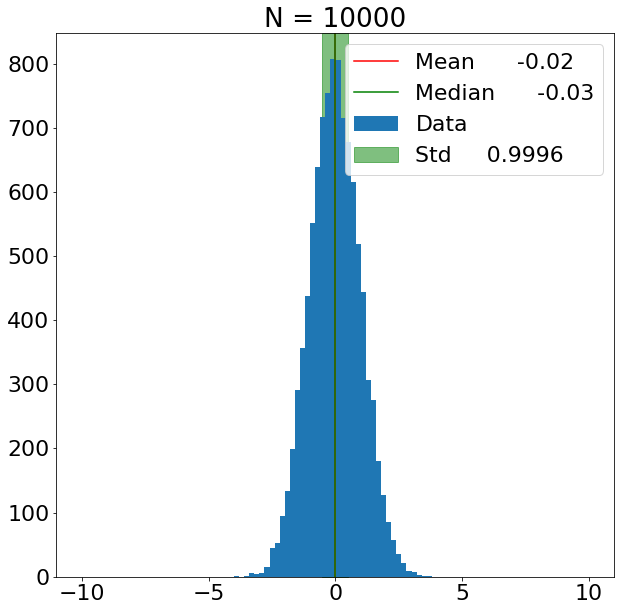

In [243]:
draw_sample(10000)

# Корреляция и ковариация

In [249]:
rv = multivariate_normal([0.5, -0.2], 
                         cov=[[0.8,0.5],
                              [0.3,0.8]])
data = rv.rvs(100)         

In [250]:
np.cov(data.T)

array([[0.83073309, 0.34483111],
       [0.34483111, 0.7585441 ]])

In [251]:
np.corrcoef(data.T)

array([[1.        , 0.43439545],
       [0.43439545, 1.        ]])

In [252]:
xmin = np.min(data)
xmax = np.max(data)
ymin = np.min(data)
ymax = np.max(data)

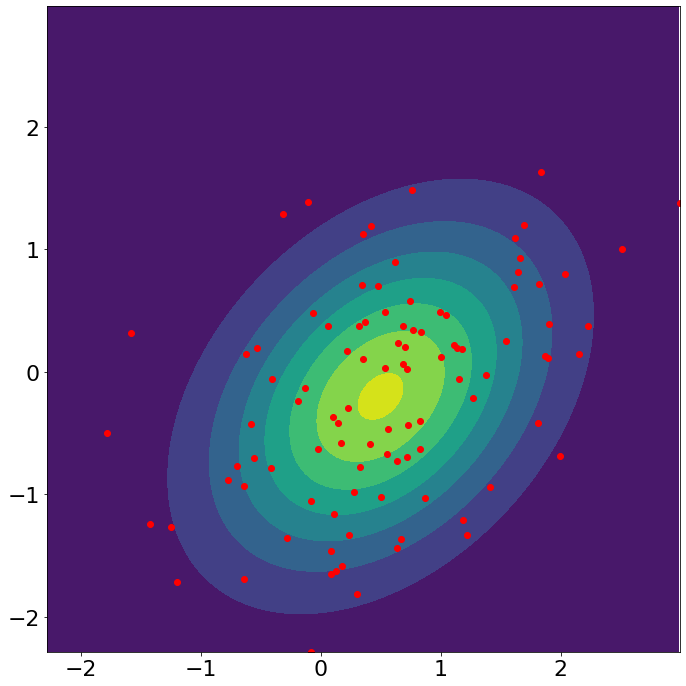

In [253]:

x, y = np.mgrid[xmin:xmax:.01, ymin:ymax:.01]
pos = np.dstack((x, y))
fig, ax = plt.subplots(figsize=(10,10))
ax.contourf(x, y, rv.pdf(pos))
ax.scatter(*data.T, color = "red")
plt.tight_layout()
ax.margins(x=0)
ax.margins(y=0)

# Отсутсвие корреляции и независимость

In [254]:
x = np.linspace(-1,1,100)

In [255]:
y = x**2

Text(-0.5, 0.9, 'Correlation = 0.000000')

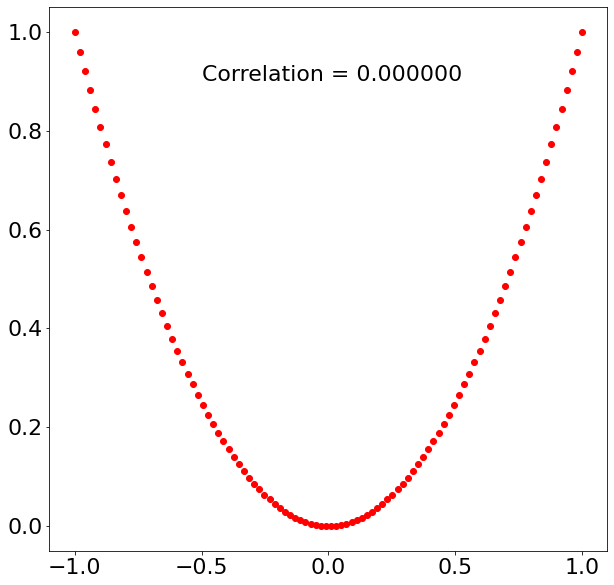

In [168]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y, color = "red")
plt.text(-0.5, 0.9,"Correlation = {:2f}".format(np.corrcoef([x,y])[1,0]))

# Закон больших чисел

0.0
0.015247813892012518
1.438397516083522
0.7723764106091686
0.7955863611010473
0.9860125061043787
1.1229170328989637
0.8531383264311313
1.0433861416510204
0.9808115893403159
0.9528173058976672
0.996587620146813
1.0090867219531445
0.9996267688378149
1.0045478434248962


Text(0.5, 1.0, 'Нормальное распределение')

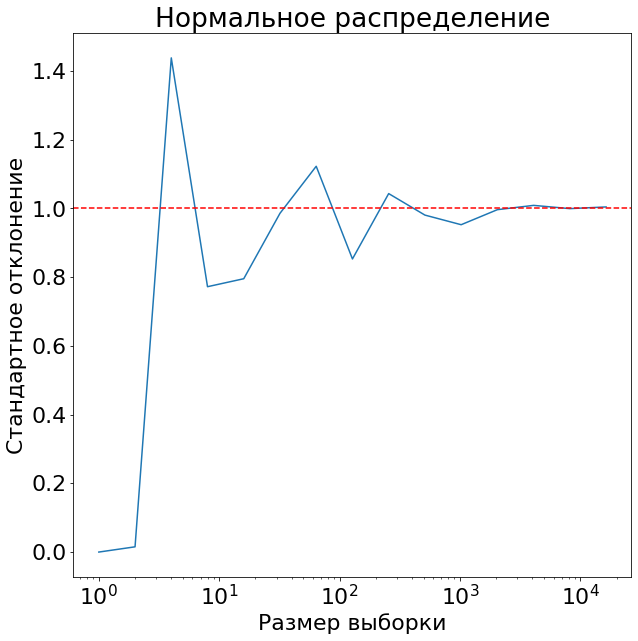

In [256]:
mu = []

x = np.array(range(0, 15))
for i in x:
    sample = norm.rvs(loc=0, scale=1, size=2**i)
    mu.append(sample.std())
    print(sample.std())

fig, ax = plt.subplots(figsize=(10,10))
plt.plot(2**x, mu)
plt.axhline(1, ls = "--", color = "red")
plt.xscale("log")
plt.xlabel("Размер выборки")
plt.ylabel("Стандартное отклонение")
plt.title("Нормальное распределение")

0.0
2.206789846718721
2.4446016918354014
8.66418890424078
4.830096010791541
1.775082976973894
18.36053824141321
6.622818155871256
102.11574222482668
15.178456162921469
18.231238677091017
48.28464189020301
59.952779201228076
355.3155984706329
93.0969038319193


Text(0.5, 1.0, 'Распределение Коши')

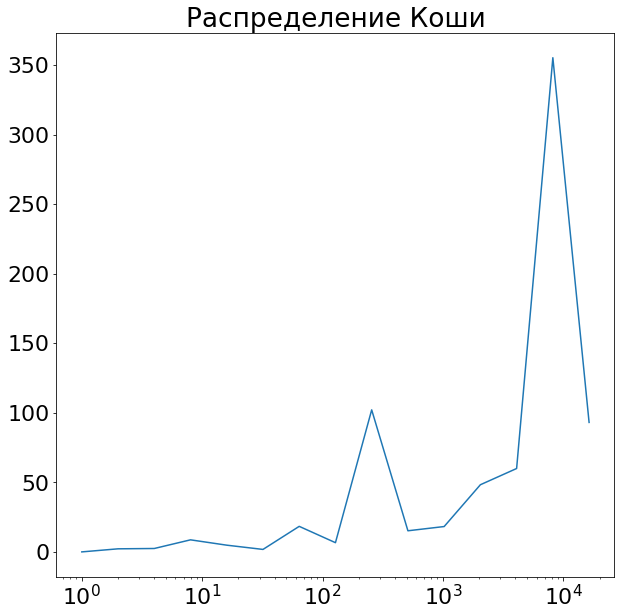

In [257]:
mu = []
f = norm
stat = std

x = np.array(range(0, 15))
for i in x:
    sample = cauchy.rvs(size=2**i)
    mu.append(sample.std())
    print(sample.std())

fig, ax = plt.subplots(figsize=(10,10))
plt.plot(2**x, mu)
# plt.axhline(1, ls = "--", color = "red")
plt.xscale("log")
plt.title("Распределение Коши")

# Свертка распределений

https://nbviewer.jupyter.org/github/timstaley/ipython-notebooks/blob/compiled/probabilistic_programming/convolving_distributions_illustration.ipynb

# Центральная предельная теорема

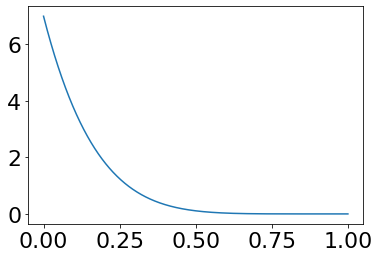

In [258]:
x = np.linspace(0,1, 1000)
y = beta.pdf(x,a = 1, b = 7)
plt.plot(x,y)

In [259]:
sums_2 = []
sums_100 = []
for i in range(0, 10000):
    sum_2 = beta.rvs(size = 2, a =1, b = 7).sum()/2
    sums_2.append(sum_2)
    
    sum_100 = beta.rvs(size = 100, a =1, b = 7).sum()/100
    sums_100.append(sum_100)


Text(0.5, 0, 'Среднее по выборке')

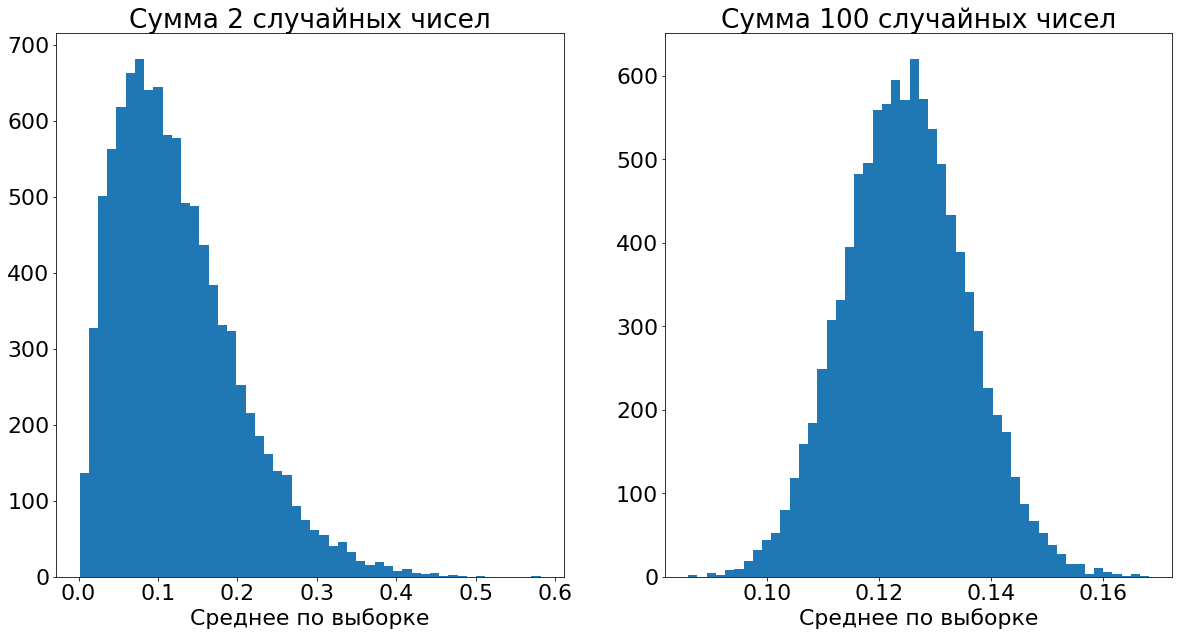

In [260]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].hist(sums_2, bins = 50)
ax[0].set_title("Сумма 2 случайных чисел")
ax[0].set_xlabel("Среднее по выборке")
ax[1].hist(sums_100, bins = 50)
ax[1].set_title("Сумма 100 случайных чисел")
ax[1].set_xlabel("Среднее по выборке")